In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
#df = pd.read_csv(r'Historical Crypto Prices', index_col=0)
df = pd.read_csv(r'gbm_data.csv', index_col=0)
#df.index = pd.to_datetime(df.index)
df

,Asset 1,Asset 2
0,93.869087,150.508868
1,96.163628,141.114896
2,94.726028,126.154493
3,97.065468,130.709880
4,101.399929,132.383576
...,...,...
247,27.418938,99.958558
248,26.697275,104.255993
249,26.224606,94.569057
250,25.348177,102.954537


Text(0.5, 1.0, 'Price Spread')

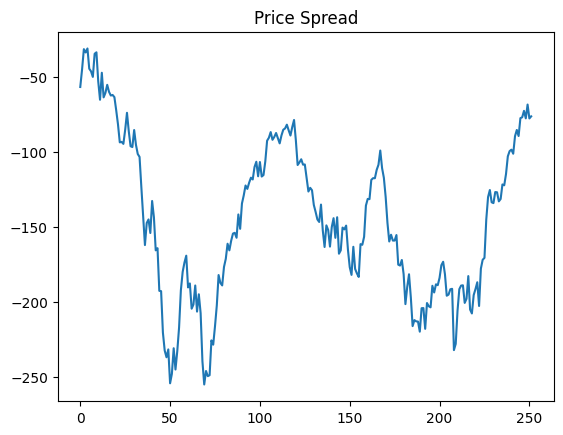

In [92]:
spread = df['Asset 1'] - df["Asset 2"]

plt.plot(spread, label="Price Spread")
plt.title("Price Spread")

Text(0.5, 1.0, 'Return Spread')

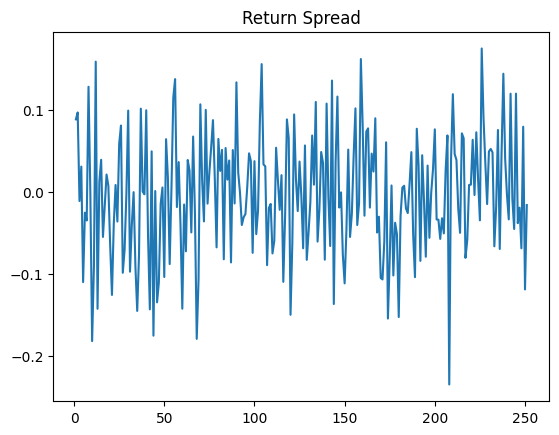

In [93]:
simple_returns = np.log(df / df.shift(1))[1:]

return_spread = simple_returns["Asset 1"] - simple_returns["Asset 2"]

plt.plot(return_spread)
plt.title("Return Spread")

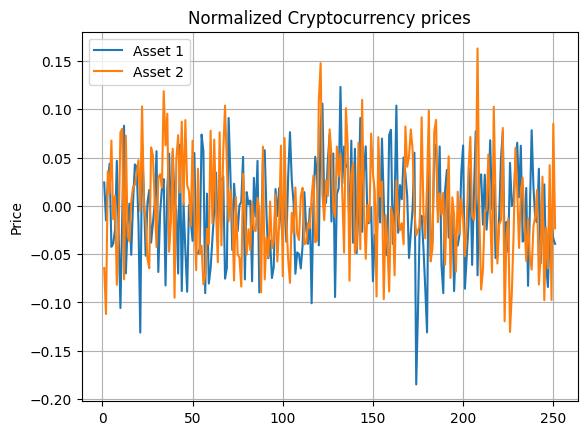

In [94]:
log_returns = np.log(df / df.shift(1))[1:]

log_returns.plot(title="Normalized Cryptocurrency prices")
plt.grid()
plt.ylabel("Price")
plt.show()

In [95]:
log_returns

,Asset 1,Asset 2
1,0.024150,-0.064448
2,-0.015062,-0.112067
3,0.024397,0.035473
4,0.043687,0.012723
5,-0.042482,0.067535
...,...,...
247,-0.084091,-0.064901
248,-0.026672,0.042094
249,-0.017863,-0.097519
250,-0.033991,0.084957


In [96]:
import pywt

def cwt_signal_extraction(x):
    n = x.size
    time_domain = np.arange(0, n)
    harmonic_level = 130        # optimal value between 120-135
    wavelet = 'cmor1.5-1.0'

    lin_slope = (np.polyfit(time_domain, x, 1))[0]
    detrend_x = x - (lin_slope * time_domain)

    scales = np.arange(1, harmonic_level+1)
    coefficients, frequencies = pywt.cwt(detrend_x, scales, wavelet)

    '''
    plt.imshow(np.abs(coefficients), extent=[0, n, scales[-1], scales[0]], cmap='viridis', aspect='auto', origin='lower')
    plt.show()
    '''
    normalized_coefficients = coefficients
    normalized_coefficients = np.real(coefficients / np.sqrt(scales[:, np.newaxis]))

    selected_coefficients = normalized_coefficients[5: harmonic_level]
    reconstructed_signal = np.sum(selected_coefficients, axis=0) + (lin_slope * time_domain)
    
    return reconstructed_signal


Minimum: -1129.4956372655806
Mean: 100.28699812191671
STD: 552.3460201373863
0     -560.407168
1     -383.545713
2     -286.697150
3     -203.819360
4     -163.612590
          ...    
247   -179.568111
248   -236.626578
249   -294.784141
250   -387.664614
251   -491.339899
Length: 252, dtype: float64


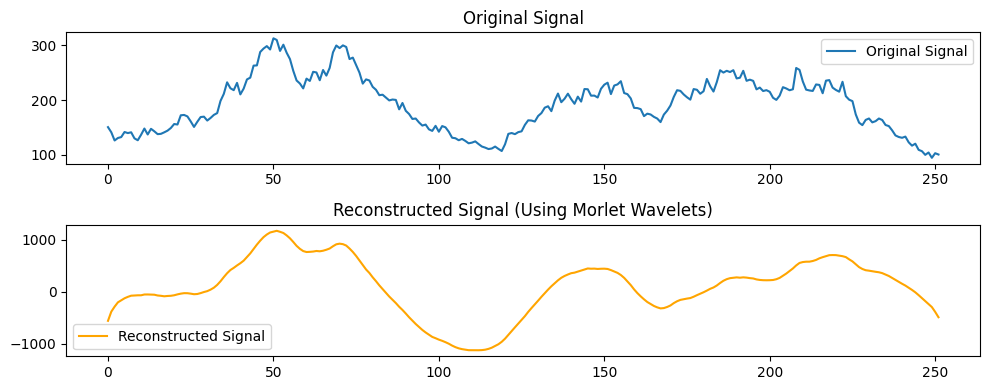

In [97]:
# Original and reconstructed signals
original_signal = np.array(df["Asset 2"])
reconstructed_signal = pd.Series(cwt_signal_extraction(original_signal))

print(f"Minimum: {min(reconstructed_signal)}")
print(f"Mean: {np.mean(reconstructed_signal)}")
print(f"STD: {np.std(reconstructed_signal)}")

#reconstructed_signal = reconstructed_signal + np.abs((min(reconstructed_signal)))

print(reconstructed_signal)


# Plot
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.title("Original Signal")
plt.plot(original_signal, label='Original Signal')
plt.legend()

plt.subplot(2, 1, 2)
plt.title("Reconstructed Signal (Using Morlet Wavelets)")
plt.plot(reconstructed_signal, label='Reconstructed Signal', color='orange')
plt.legend()

plt.tight_layout()
plt.show()

In [71]:
reconstructed_signal = np.log(np.diff(reconstructed_signal))
reconstructed_signal

/var/folders/fq/z24khhns33x9rhh825t84fmr0000gn/T/ipykernel_36498/920362860.py:1: RuntimeWarning: invalid value encountered in log
  reconstructed_signal = np.log(np.diff(reconstructed_signal))


array([ 5.17536669,  4.57314856,  4.4173671 ,  3.69403539,  3.64067035,
        3.31970698,  3.11011268,  1.46122249,  1.15086911, -1.21023492,
        2.71556387, -0.46573832,         nan,         nan,         nan,
               nan,         nan,  1.82617979,  1.25155961,  2.30625905,
        2.84277608,  2.65476208,  2.20677243,         nan,         nan,
               nan,  1.46370806,  2.83813937,  3.03828697,  2.85429919,
        3.36638943,  3.62262068,  3.98630325,  4.24436619,  4.39199507,
        4.31343992,  4.13002567,  3.72175457,  3.8478125 ,  3.75929994,
        3.89364244,  4.24732824,  4.25772356,  4.43849147,  4.43715408,
        4.33141549,  4.2199093 ,  3.92947045,  3.66942012,  2.82722856,
        2.74367701,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
        1.27157369,  1.74935853,  2.37768477,         nan,  2.39110429,
        2.95066107,  3.17071381,  3.78170029,  3.62002391,  2.50

In [ ]:
import numpy as np
import pylab as pl
from numpy import fft
    
def fourierExtrapolation(x, n_predict):
    print(x)
    n = x.size
    n_harm = 15                     # number of harmonics in model
    t = np.arange(0, n)             # time steps for time series, i.e., x-axis
    #print(f't variable: {t}')
    p = np.polyfit(t, x, 1)         # find linear trend in x, p[0]=slope, p[1]=intercept
    #pl.plot(p, label="linear trend", color='red', alpha=.5)
    #pl.plot(x, label="observed data", color="blue", alpha=.5)
    #pl.show()
    x_notrend = x - p[0] * t        # detrended x
    pl.plot(x_notrend, label='x_notrend', color="blue")
    pl.plot(x, label="x", color="red")
    pl.show()

    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    print(len(x_freqdom))
    print(x_freqdom[0])
    print(x_freqdom)

    test = fft.ifft(x_freqdom)
    print(test)
    
    f = fft.fftfreq(n)              # frequencies
    print(f)
    print(len(f))
    # sort indexes by frequency, lower -> higher
    indexes = list(range(n))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t
    
def main():
    x = np.array(normalized_df['Asset 2'][:-100]) 
    price_path = np.array(normalized_df['Asset 2'])
    n_predict = 100
    extrapolation = fourierExtrapolation(x, n_predict)
    pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
    pl.plot(np.arange(0, x.size), x, 'b', label = 'x', linewidth = 3, alpha=.5)
    pl
    pl.legend()
    pl.show()

main()

In [104]:
from numpy.fft import fft, fftfreq

def fft_signal_extraction(x):
    '''
    Approach: Decompositon of a signal into infinite sinusoidal functions.
    Resolution: High frequency resolution, but no time information.
    Signal Type: Assumes the signal is stationary.
    Localization: Frequenices are global, affecting the entire signal.

    It falls short of sudden trend changes; however, we want to keep trend changes, only getting rid of noise.

    Does not tell you when specific frequency components occur in the time series, i.e., global generalization.
    '''
    n = x.size           
    harmonic_level = 20         # harmonic levels
    time_domain = np.arange(0, n)    # our time domain
    
    # detrending the observed data
    lin_slope = (np.polyfit(time_domain, x, 1))[0]
    detrend_x = x - (lin_slope * time_domain)

    # fast fourier transform
    fft_result = fft(detrend_x)
    freq_domain = fftfreq(n)

    # restoring signal
    denoised_signal = np.zeros(n)
    for i in range(0, 1 + harmonic_level * 2):
        amplitude = np.absolute(fft_result[i]) / n
        phase = np.angle(fft_result[i])
        denoised_signal += amplitude * np.cos(2 * np.pi * freq_domain[i] * time_domain + phase)
    
    # retrending data
    return denoised_signal + lin_slope * time_domain

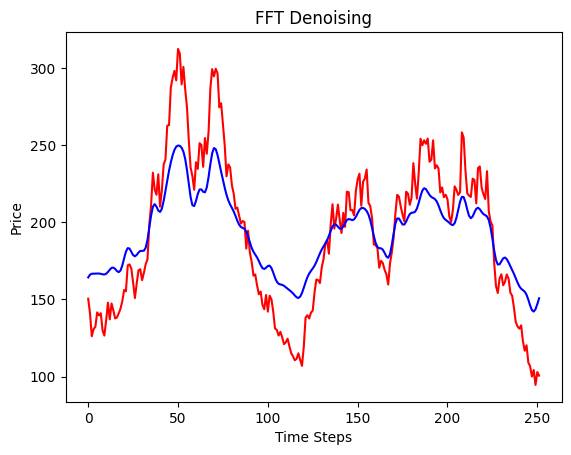

In [105]:
x = np.array(df["Asset 2"])
denoise_signal = fft_signal_extraction(x)
plt.plot(x, label="original time series", color="red")
plt.plot(denoise_signal, label="denoised_time_series", color="blue")
plt.ylabel("Price")
plt.xlabel("Time Steps")
plt.title("FFT Denoising")
plt.show()